Task -02

In [25]:
import pandas as pd

# Load training, test, and submission datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('gender_submission.csv')

# Check the first few rows
print(train_df.head())
print(test_df.head())
print(submission_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

2. Data Cleaning on train.csv

2.1 Handle Missing Values

In [33]:
# Check for missing columns before dropping
if 'Cabin' in train_df.columns:
    train_df = train_df.drop('Cabin', axis=1)

# Fill missing values in 'Age' and 'Embarked' columns
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Apply the same logic to the test dataset
if 'Cabin' in test_df.columns:
    test_df = test_df.drop('Cabin', axis=1)

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


In [35]:
print("Columns in train_df:", train_df.columns)
print("Columns in test_df:", test_df.columns)

print("Missing values in train_df:\n", train_df.isnull().sum())
print("Missing values in test_df:\n", test_df.isnull().sum())


Columns in train_df: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Columns in test_df: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Missing values in train_df:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing values in test_df:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


2.2Drop Irrelevant Columns

In [38]:
# Drop irrelevant columns
train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)


3: Feature Engineering

In [43]:
# Map 'Sex' column to numeric values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


 4: Exploratory Data Analysis (EDA)

a.Survival Rate

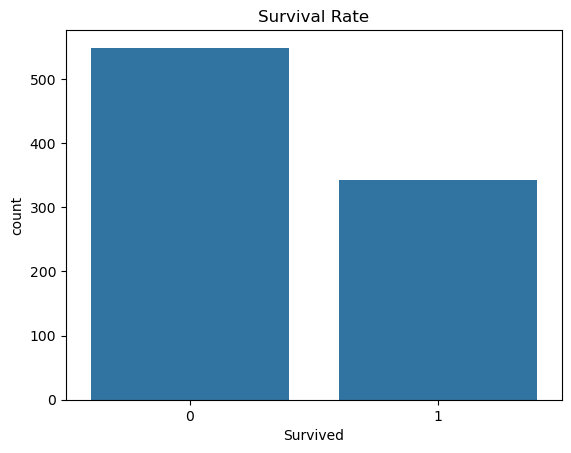

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Rate')
plt.show()


b. Survival by Gender

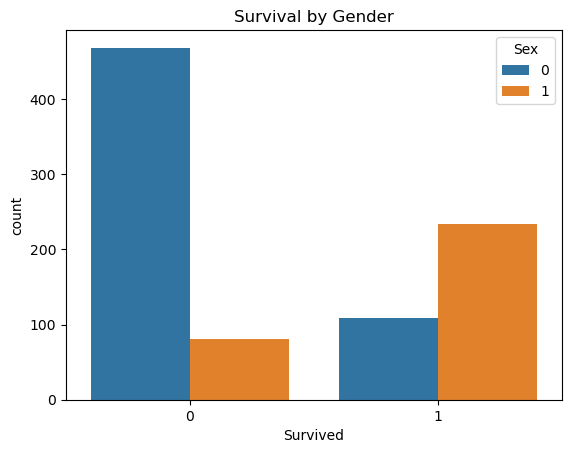

In [50]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()


c. Survival by Passenger Class

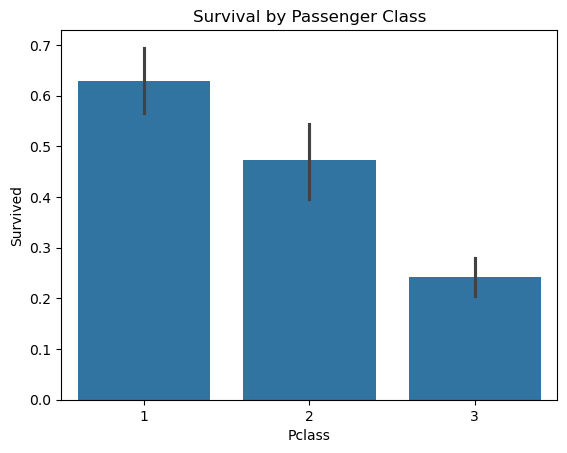

In [53]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()


d. Age Distribution

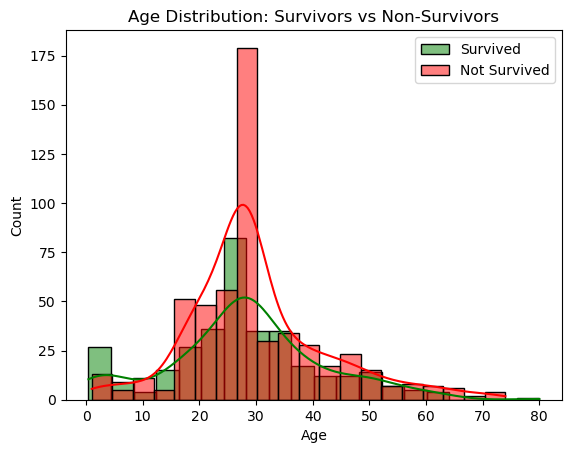

In [61]:
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()


 Merge test.csv with gender_submission.csv

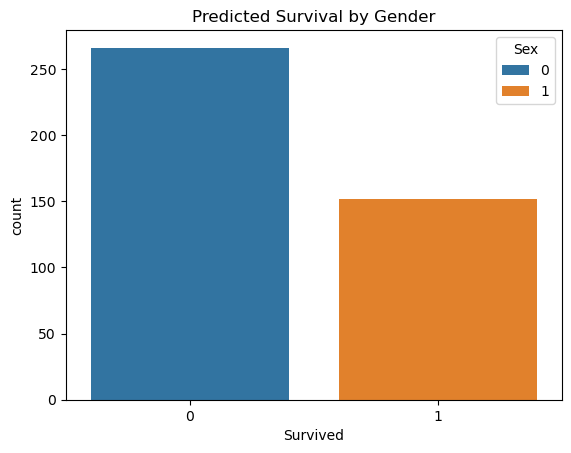

In [64]:
# Merge test data with submission predictions
merged_df = pd.merge(test_df, submission_df, on='PassengerId')

# Visualize predicted survival by gender
sns.countplot(x='Survived', hue='Sex', data=merged_df)
plt.title('Predicted Survival by Gender')
plt.show()


In [66]:
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)


Building and Evaluating the Model

In [71]:
# Only encode 'Sex' if 'Embarked' is missing
from sklearn.preprocessing import LabelEncoder

if 'Sex' in train_df.columns:
    train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])

if 'Sex' in test_df.columns:
    test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

# Ensure no processing happens on 'Embarked' if it's missing
if 'Embarked' in train_df.columns:
    train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])

if 'Embarked' in test_df.columns:
    test_df['Embarked'] = LabelEncoder().fit_transform(test_df['Embarked'])


In [75]:
# Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


In [77]:
# Create IsAlone feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df['Fare'] = scaler.fit_transform(train_df[['Fare']])
test_df['Fare'] = scaler.transform(test_df[['Fare']])


In [83]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation data
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [89]:
# Ensure test_df has the same columns as X_train
test_df = test_df[X_train.columns]  # Align columns with training features

# Predict on the test dataset
test_predictions = model.predict(test_df)

# Prepare submission
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv')['PassengerId'],  # Reload PassengerId from the original test data
    'Survived': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")


Submission file saved as submission.csv
